#Loading Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report,ConfusionMatrixDisplay


Imported necessary libraries.

#Data Preparation

In [2]:
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks/')


redwine_quality_data = pd.read_csv('winequality-red.csv')
print(redwine_quality_data.head())

#Preprocessing
#removed missing data
redwine_quality_data.dropna(inplace=True)

# Features and target
X = redwine_quality_data.drop('quality', axis=1)
y = redwine_quality_data['quality']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# 1 => High quality Wine, 0 => not High quality wine
y_train_cls = (y_train >= 7).astype(int)
y_test_cls = (y_test >= 7).astype(int)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Fitting the Model

## Regression

In [3]:


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)



In [4]:
mlp_reg_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

mlp_reg_grid = GridSearchCV(MLPRegressor(max_iter=1000), mlp_reg_params, cv=4)
mlp_reg_grid.fit(X_train, y_train)

mlp_preds = mlp_reg_grid.predict(X_test)
print("Best MLP Regressor Params:", mlp_reg_grid.best_params_)


Best MLP Regressor Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


In [5]:
# Gradient Boosting Regressor Tuning
gbr_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=4)
gbr_grid.fit(X_train, y_train)
gbr_preds = gbr_grid.predict(X_test)

print("Best GBR Params:", gbr_grid.best_params_)



Best GBR Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}


## Classification

In [6]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train_cls)
log_preds = log_reg.predict(X_test)



In [7]:
mlp_cls_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

mlp_cls_grid = GridSearchCV(MLPClassifier(max_iter=1000), mlp_cls_params, cv=4)
mlp_cls_grid.fit(X_train, y_train_cls)

mlp_preds_cls = mlp_cls_grid.predict(X_test)
print("Best MLP Classifier Params:", mlp_cls_grid.best_params_)



Best MLP Classifier Params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}


In [8]:
# Gradient Boosting Classifier Tuning
gbc_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), gbc_params, cv=4)
gbc_grid.fit(X_train, y_train_cls)
gbc_preds = gbc_grid.predict(X_test)

print("Best GBC Params:", gbc_grid.best_params_)



Best GBC Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


# Evaluation

In [9]:
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R²:", r2_score(y_test, lr_preds))

print("\nMLP:")
print("MSE:", mean_squared_error(y_test, mlp_preds))
print("R²:", r2_score(y_test, mlp_preds))

print("\nGradient Boosting Regression:")
print("MSE:", mean_squared_error(y_test, gbr_preds))
print("R²:", r2_score(y_test, gbr_preds))


print("\nLogistic Regression :")
print("Accuracy:", accuracy_score(y_test_cls, log_preds))
print(classification_report(y_test_cls, log_preds, zero_division=0))

print("\nMLP Classifier:")
print("Accuracy:", accuracy_score(y_test_cls, mlp_preds_cls))
print(classification_report(y_test_cls, mlp_preds_cls,zero_division=0))

print("\nGradient Boosting Classification:")
print("Accuracy:", accuracy_score(y_test_cls, gbc_preds))
print(classification_report(y_test_cls, gbc_preds))

Linear Regression:
MSE: 0.39002514396395427
R²: 0.403180341279623

MLP:
MSE: 0.3818687381688234
R²: 0.41566134000078436

Gradient Boosting Regression:
MSE: 0.3535690681198873
R²: 0.4589657260945851

Logistic Regression :
Accuracy: 0.859375
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320


MLP Classifier:
Accuracy: 0.86875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.65      0.23      0.34        47

    accuracy                           0.87       320
   macro avg       0.76      0.61      0.64       320
weighted avg       0.85      0.87      0.84       320


Gradient Boosting Classification:
Accuracy: 0.89375
              prec

I started with Linear and Logistic Regression as baseline models, and added MLP and Gradient Boosting for more advanced learning. I tuned both MLP and Gradient Boosting using GridSearchCV to improve their performance. This allowed me to compare different models effectively. In the end, Gradient Boosting gave the best results for both predicting quality scores and classifying high-quality wines.

#Visualization

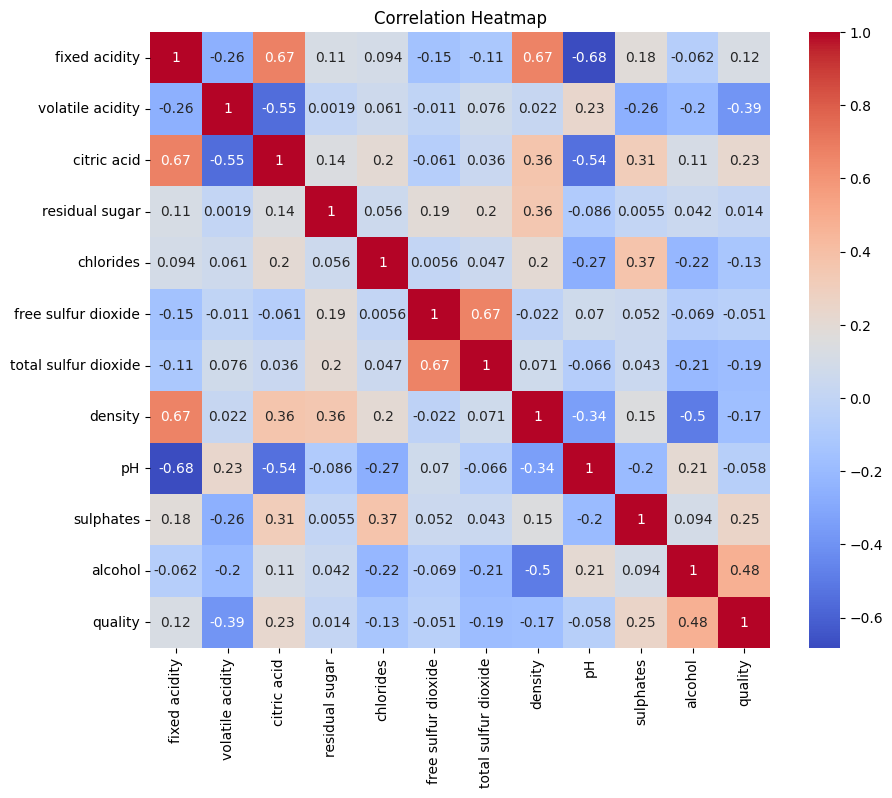

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(redwine_quality_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




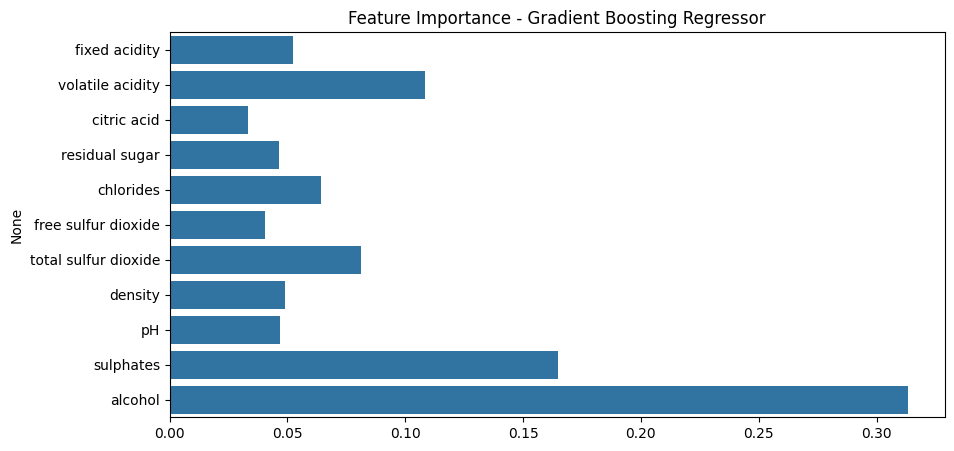

In [11]:

plt.figure(figsize=(10, 5))
sns.barplot(x=gbr_grid.best_estimator_.feature_importances_, y=X.columns)
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.show()



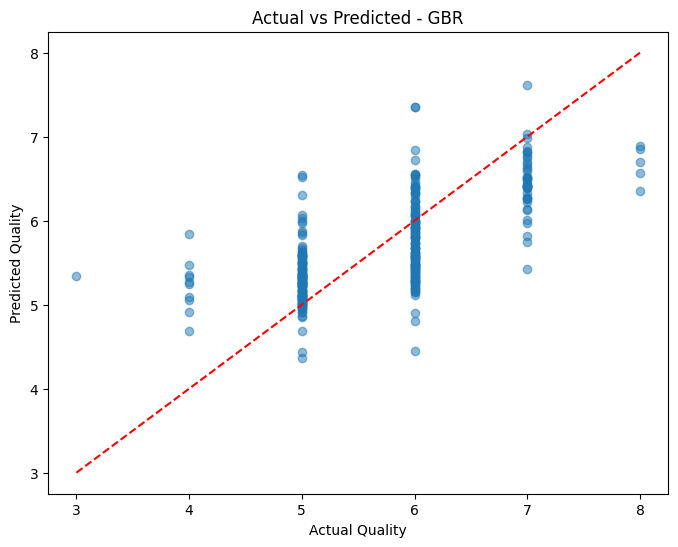

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_preds, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted - GBR")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



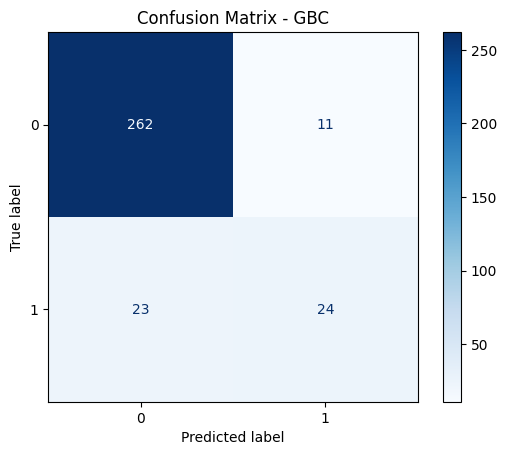

In [12]:
ConfusionMatrixDisplay.from_estimator(gbc_grid.best_estimator_, X_test, y_test_cls, cmap='Blues')
plt.title("Confusion Matrix - GBC")
plt.show()